Name - Aarya Ramchandra Tarphe

Batch - February 2025

Position - Machine Learning Intern

Task-3 : Cuisine Classification

Objective: Develop a machine learning model to
classify restaurants based on their cuisines.

# Importing Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [ ]:
df = pd.read_csv("/content/Dataset .csv")

# Data Pre-processing

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.shape

(9551, 21)

# Data Cleaning

In [ ]:
df.drop(columns=['Restaurant ID', 'Country Code', 'Address', 'Locality Verbose', 'Longitude', 'Latitude', 'Currency'], inplace=True)

In [ ]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

<ipython-input-9-0293b22786c4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)


In [ ]:
df['Price range'].fillna(df['Price range'].mode()[0], inplace=True)

<ipython-input-10-214545bcfbf9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price range'].fillna(df['Price range'].mode()[0], inplace=True)


In [ ]:
df['Aggregate rating'].fillna(df['Aggregate rating'].median(), inplace=True)

<ipython-input-11-32d52f661f48>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Aggregate rating'].fillna(df['Aggregate rating'].median(), inplace=True)


In [ ]:
df['Votes'].fillna(0, inplace=True)

<ipython-input-12-500ede3c55d7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Votes'].fillna(0, inplace=True)


In [ ]:
df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(',')[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   City                  9551 non-null   object 
 2   Locality              9551 non-null   object 
 3   Cuisines              9551 non-null   object 
 4   Average Cost for two  9551 non-null   int64  
 5   Has Table booking     9551 non-null   object 
 6   Has Online delivery   9551 non-null   object 
 7   Is delivering now     9551 non-null   object 
 8   Switch to order menu  9551 non-null   object 
 9   Price range           9551 non-null   int64  
 10  Aggregate rating      9551 non-null   float64
 11  Rating color          9551 non-null   object 
 12  Rating text           9551 non-null   object 
 13  Votes                 9551 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.0+ MB


# Data Visualization

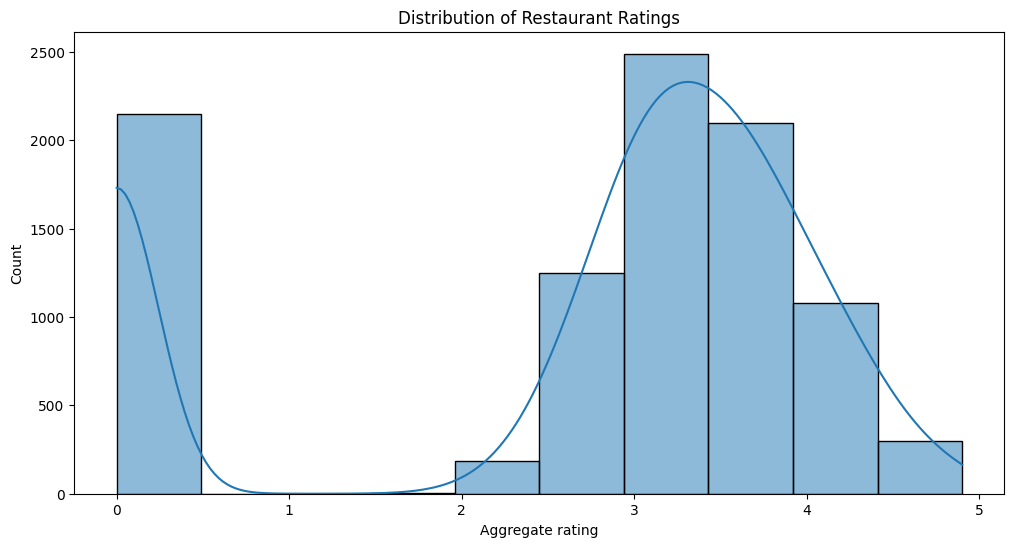

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.show()

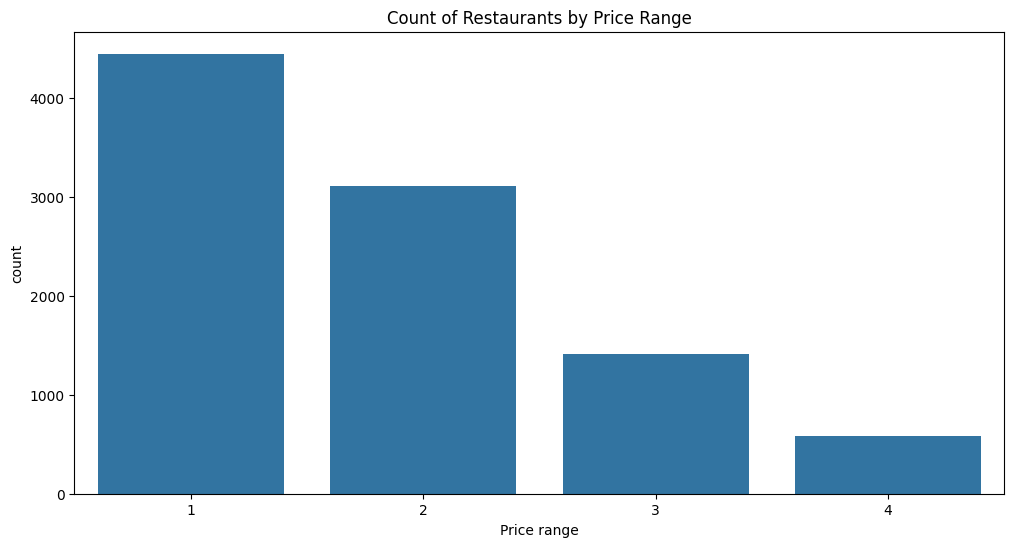

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Price range', data=df)
plt.title('Count of Restaurants by Price Range')
plt.show()

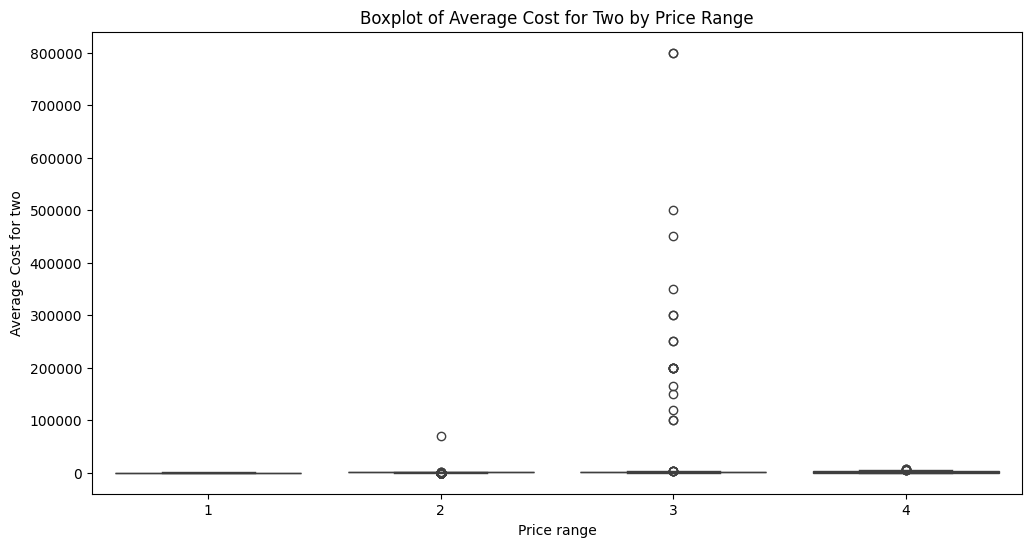

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price range', y='Average Cost for two', data=df)
plt.title('Boxplot of Average Cost for Two by Price Range')
plt.show()

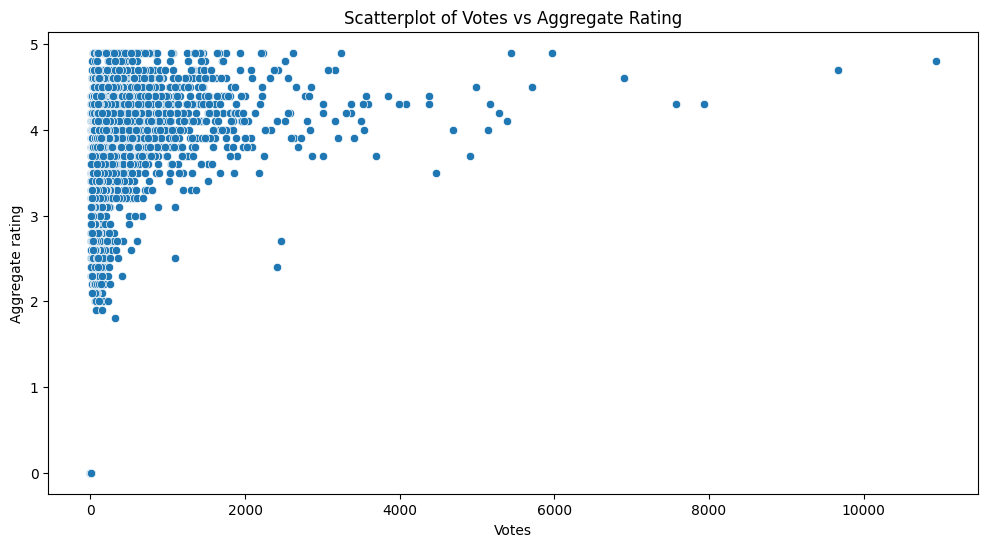

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Scatterplot of Votes vs Aggregate Rating')
plt.show()

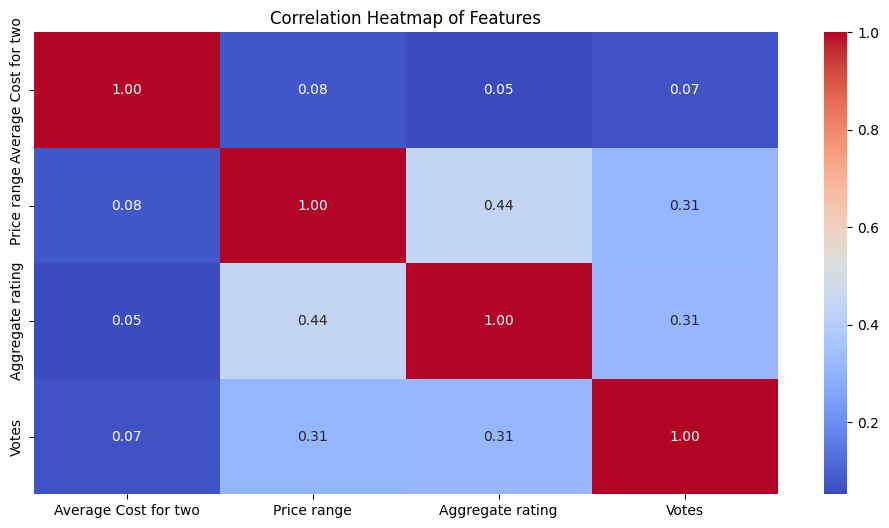

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

# Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
le = LabelEncoder()
df['Cuisines'] = le.fit_transform(df['Cuisines'])

categorical_features = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating text']
numerical_features = ['Average Cost for two', 'Votes', 'Aggregate rating', 'Price range']


In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Model Training

In [ ]:
X = df.drop(columns=['Cuisines'])
y = df['Cuisines']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Average Cost for two',
                                                   'Votes', 'Aggregate rating',
                                                   'Price range']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now',
                                                   'Rating text'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

# Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       0.00      1.00      0.00         0
           2       0.18      0.24      0.20        46
           3       0.00      0.00      0.00         1
           4       0.00      1.00      0.00         0
           6       0.00      0.00      0.00        13
           7       0.00      1.00      0.00         0
          10       0.00      1.00      0.00         0
          11       0.00      0.00      0.00         3
          12       0.12      0.11      0.11       112
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         3
          15       0.14      0.11      0.12        19
          16       1.00      0.00      0.00         1
          17       0.00      0.00      0.00        18
          18       0.33      0.33      0.33         3
          19       0.20      0.12      0.15         8
          20       1.00      0.00      0.00         4
          21       0.00    

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [ ]:
cuisine_counts = df['Cuisines'].value_counts()

df = df[df['Cuisines'].isin(cuisine_counts[cuisine_counts > 1].index)]

X = df.drop(columns=['Cuisines'])
y = df['Cuisines']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
rare_cuisines = cuisine_counts[cuisine_counts < min_samples].index
df['Cuisines'] = df['Cuisines'].apply(lambda x: 'Other' if x in rare_cuisines else x)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6962224554039874
Classification Report:
               precision    recall  f1-score   support

           2       0.84      0.83      0.83        64
           4       0.00      0.00      0.00         1
           6       1.00      0.94      0.97        18
           7       1.00      1.00      1.00         1
          10       1.00      0.67      0.80         3
          11       1.00      0.83      0.91         6
          12       0.66      0.53      0.59       129
          13       0.50      0.25      0.33         4
          14       1.00      0.75      0.86         4
          15       0.75      0.30      0.43        20
          17       0.67      0.40      0.50        20
          18       1.00      0.80      0.89         5
          19       0.25      0.33      0.29         3
          20       1.00      1.00      1.00         2
          21       0.81      0.85      0.83        20
          23       0.81      0.77      0.79       113
          25       1.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Conclusion

Hence successfully implemented Cuisine Classification model using Random Forest Machine learning algorithm.